Taller 1 Métodos Computacionales 2
Catalina Fuentes y Silvana Archila

Pregunta #1


In [577]:
import numpy as np

def transformada_discreta(y_k, t_k, f):
    N = len(t_k)
    suma = 0.+0j
    for i in range (N):
        suma += y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
    return suma


In [578]:
t_k = np.linspace(0,20,200)
y_k = np.sin(t_k)
f = 0.1

x = transformada_discreta(y_k,t_k,f)
print(x)

(10.18289058873271-9.43536532570872j)


Pregunta #2

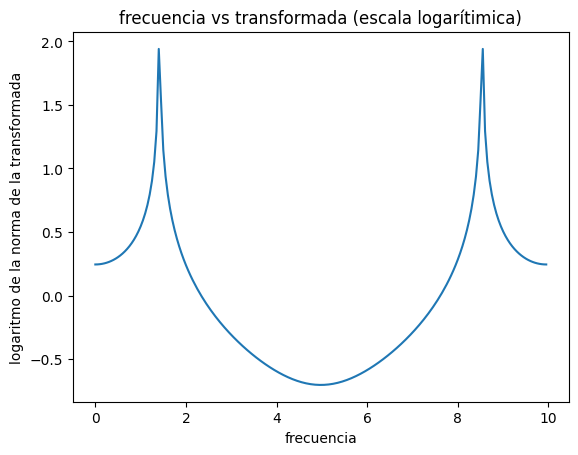

In [579]:
#GRÁFICA SEÑAL DE PRUEBA
import matplotlib.pyplot as plt
t_k = np.linspace(0,20,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia vs transformada (escala logarítimica)")
plt.xlabel("frecuencia")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()


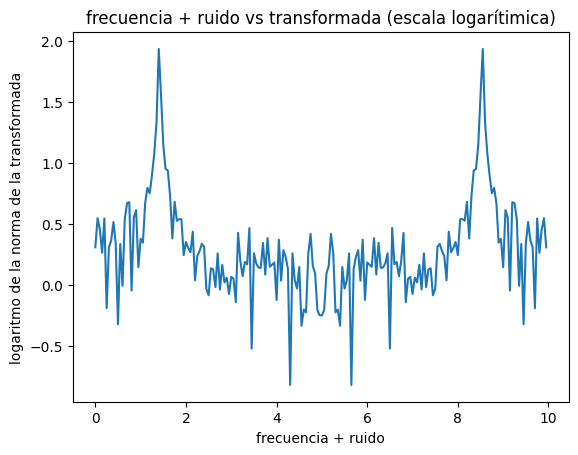

In [580]:
#GRÁFICA CON RUIDO EN Y
y_ruido = np.random.normal(0.0,0.1,len(y_k))
x = transformada_discreta(y_k + y_ruido,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia + ruido vs transformada (escala logarítimica)")
plt.xlabel("frecuencia + ruido")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()

Pregunta #3

In [581]:
#Hallar pico de media altura 

t_k = np.linspace(0,20,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(2*t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)

print(f"El pico principal de la norma de la transformada se encuentra a {f[norma.argmax()]} Hz.")

El pico principal de la norma de la transformada se encuentra a 1.4249999999999998 Hz.


In [582]:
F = x
Fmax_medios = norma.argmax()/2
IDX = abs(abs(F) - Fmax_medios).argmin()
print(f[IDX] - f[norma.argmax()])

#CREO QUE ESTO ESTÁ MAL


-0.050000000000000044


In [583]:
#Cambiando N
t_k = np.linspace(0,20,400)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(2*t_k[1]), 400)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)

print(f"El pico principal de la norma de la transformada después de cambiar N se encuentra a {f[norma.argmax()]} Hz.")
print("Podemos ver que la posición del pico cambia muy poco después de aumentar N ya que, con más particiones, el pico principal se puede encontrar con más precisión.")

#FALTA VER QUÉ PASA CON EL ANCHO

El pico principal de la norma de la transformada después de cambiar N se encuentra a 1.4250000000000003 Hz.
Podemos ver que la posición del pico cambia muy poco después de aumentar N ya que, con más particiones, el pico principal se puede encontrar con más precisión.


In [584]:
#Cambiando el rango de tiempo t_k
t_k = np.linspace(0,50,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(2*t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)

print(f"El pico principal de la norma de la transformada después de cambiar el rango de tiempo se encuentra a {f[norma.argmax()]} Hz.")
print("Podemos ver que la posición del pico cambia después de aumentar el rango de tiempo ya que, con la misma cantidad de particiones para un rango más grande, el pico principal se encuentra con menos precisión.")

#FALTA VER QUÉ PASA CON EL ANCHO

El pico principal de la norma de la transformada después de cambiar el rango de tiempo se encuentra a 1.41 Hz.
Podemos ver que la posición del pico cambia después de aumentar el rango de tiempo ya que, con la misma cantidad de particiones para un rango más grande, el pico principal se encuentra con menos precisión.


PREGUNTA #4

In [585]:
#NO SÉ SI INCLUIR EL RANDOM O NO

N = 200
t_k = np.linspace(0,50,200) #+ np.random.normal(0.,0.01,N)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 10/(2*t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)

print(f"El pico principal de la norma de la transformada al evaluar la transformada hasta varias veces la frecuencia de Nyquist es {f[norma.argmax()]} Hz.")
print("No es posible recuperar la frecuencia original siempre puesto que introducimos un factor de aleatoriedad en el tiempo de muestreo. Además, al esocger una señal de prueba con una frecuencia mucho mayor a la de Nyquist introducimos muchos más picos de frecuencias que hacen que no podamos distinguir cuál es el verdadero.")

El pico principal de la norma de la transformada al evaluar la transformada hasta varias veces la frecuencia de Nyquist es 5.4 Hz.
No es posible recuperar la frecuencia original siempre puesto que introducimos un factor de aleatoriedad en el tiempo de muestreo. Además, al esocger una señal de prueba con una frecuencia mucho mayor a la de Nyquist introducimos muchos más picos de frecuencias que hacen que no podamos distinguir cuál es el verdadero.


PREGUNTA #5

In [586]:
import pandas as pd
df = pd.read_csv("datos_taller1.dat", sep="\s+", names=["t", "y", "sigma"])

Frecuencia principal: 0.5156541353383459
Frecuencia de muestreo: 0.499550404635827


c:\Users\silva\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


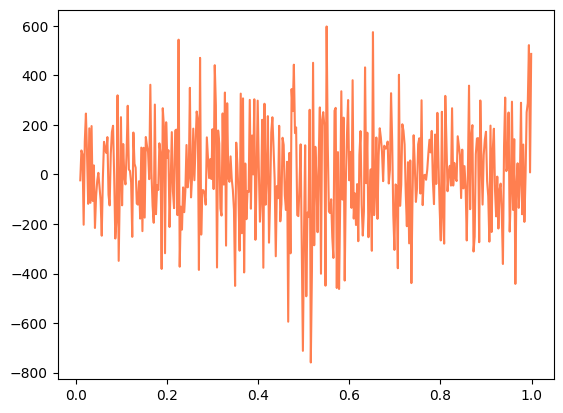

In [587]:
sampling_freq = 1 / (df["t"][1] - df["t"][0])
f = np.linspace(0.01, 0.999, 400)
transformada = transformada_discreta(df["y"], df["t"], f)
main_freq = f[np.argmax(np.abs(transformada))]
print("Frecuencia principal:", main_freq)
print("Frecuencia de muestreo:", sampling_freq)

plt.plot(f,transformada, color = "coral")
plt.show()

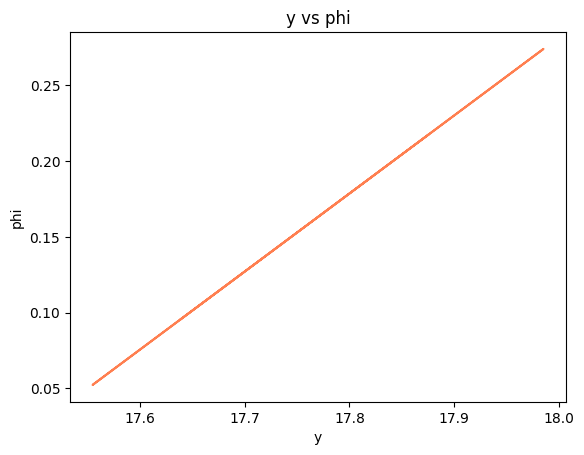

La función phi representa el residuo de la multiplicación entre los datos en "y" y la frecuencia principal dividido 1. En la gráfica podemos ver un comportamiento lineal, indicando que, a medida que los valores de "y" aumentan, también aumenta el valor de phi.


In [588]:
phi = np.mod(df["y"]*main_freq, 1)

plt.plot(df["y"], phi, color = "coral")
plt.title("y vs phi")
plt.xlabel("y")
plt.ylabel("phi")
plt.show()

print("La función phi representa el residuo de la multiplicación entre los datos en \"y\" y la frecuencia principal dividido 1. En la gráfica podemos ver un comportamiento lineal, indicando que, a medida que los valores de \"y\" aumentan, también aumenta el valor de phi.")